In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import math
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df_new = pd.read_csv("2020/october/yellow_tripdata_2020-10.csv" , low_memory=False)

In [3]:
df = df_new.dropna()

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-10-01 00:09:08,2020-10-01 00:11:05,1.0,0.00,1.0,N,145,145,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5
2,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,3.0,0.5,2.56,0.0,0.3,15.36,2.5
3,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,3.0,-2.5,-0.5,-0.5,0.00,0.0,-0.3,-3.80,0.0
4,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,1.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575213,2.0,2020-10-31 23:11:43,2020-10-31 23:15:21,1.0,0.83,1.0,N,262,236,1.0,5.0,0.5,0.5,1.20,0.0,0.3,10.00,2.5
1575214,2.0,2020-10-31 23:19:11,2020-10-31 23:19:39,1.0,0.12,1.0,N,236,43,2.0,2.5,0.5,0.5,0.00,0.0,0.3,6.30,2.5
1575215,2.0,2020-10-31 23:30:11,2020-11-01 00:06:20,1.0,7.37,1.0,N,239,25,1.0,28.5,0.5,0.5,8.07,0.0,0.3,40.37,2.5
1575216,2.0,2020-10-31 23:09:36,2020-10-31 23:15:34,2.0,1.35,1.0,N,262,140,1.0,6.5,0.5,0.5,1.50,0.0,0.3,11.80,2.5


In [5]:
df.RatecodeID.describe()

count    1.575218e+06
mean     1.027878e+00
std      5.614400e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

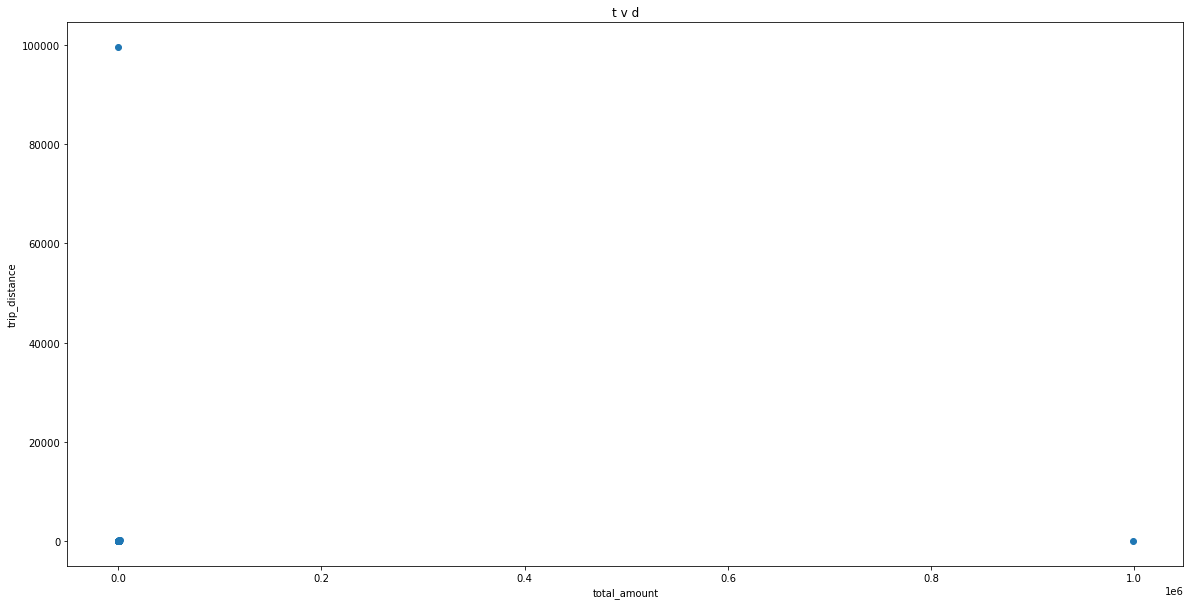

In [6]:
import matplotlib.pyplot as plt


plt.scatter(df.total_amount, df.trip_distance)
plt.xlabel('total_amount')
plt.ylabel('trip_distance')
plt.title('t v d')
plt.show()

In [7]:
df.trip_distance.describe()

count    1.575218e+06
mean     2.535423e+00
std      7.941405e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.610000e+00
75%      2.740000e+00
max      9.960311e+04
Name: trip_distance, dtype: float64

In [8]:
df.shape

(1575218, 18)

In [9]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('VendorID'):
        m = np.mean(subdf.trip_distance)
        st = np.std(subdf.trip_distance)
        reduced_df = subdf[(subdf.trip_distance> 0 ) & (subdf.trip_distance<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df)
df2.shape

(1510521, 18)

In [10]:
df2.trip_distance.describe()

count    1.510521e+06
mean     2.309853e+00
std      2.632248e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.600000e+00
75%      2.630000e+00
max      9.831000e+01
Name: trip_distance, dtype: float64

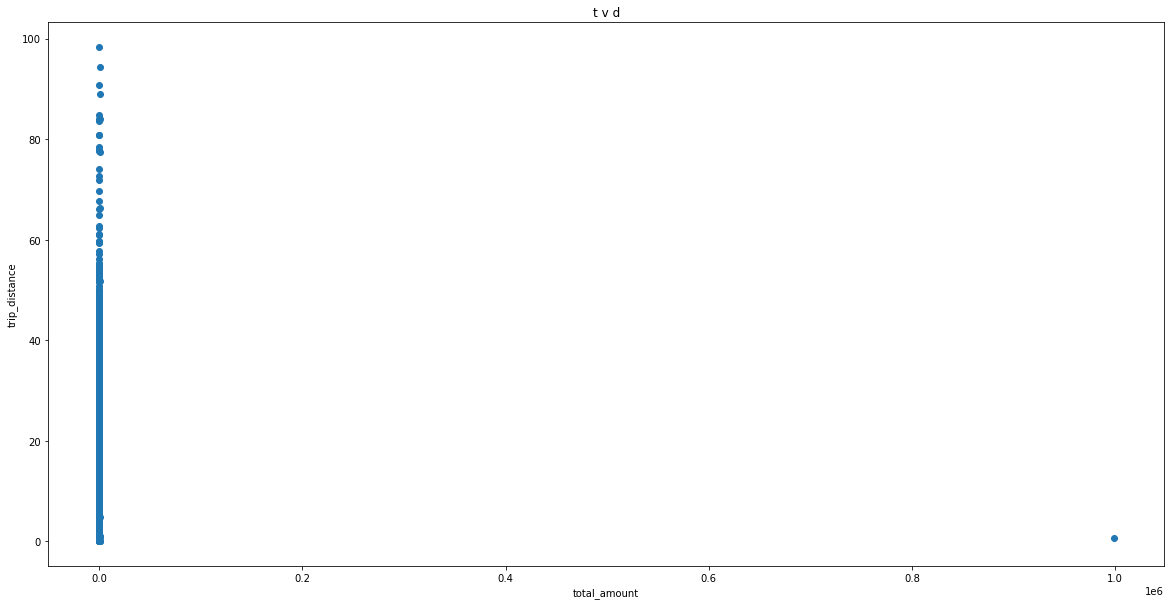

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.scatter(df2.total_amount, df2.trip_distance)
plt.xlabel('total_amount')
plt.ylabel('trip_distance')
plt.title('t v d')
plt.show()

In [12]:
def remove_pps_outliers(df2):
    df_out = pd.DataFrame()
    for key, subdf2 in df2.groupby('VendorID'):
        m = np.mean(subdf2.total_amount)
        st = np.std(subdf2.total_amount)
        reduced_df = subdf2[(subdf2.total_amount> 0 ) & (subdf2.total_amount<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(1409618, 18)

In [13]:
df3.total_amount.describe()

count    1.409618e+06
mean     1.420318e+01
std      4.768008e+00
min      3.000000e-01
25%      1.080000e+01
50%      1.330000e+01
75%      1.680000e+01
max      6.553000e+02
Name: total_amount, dtype: float64

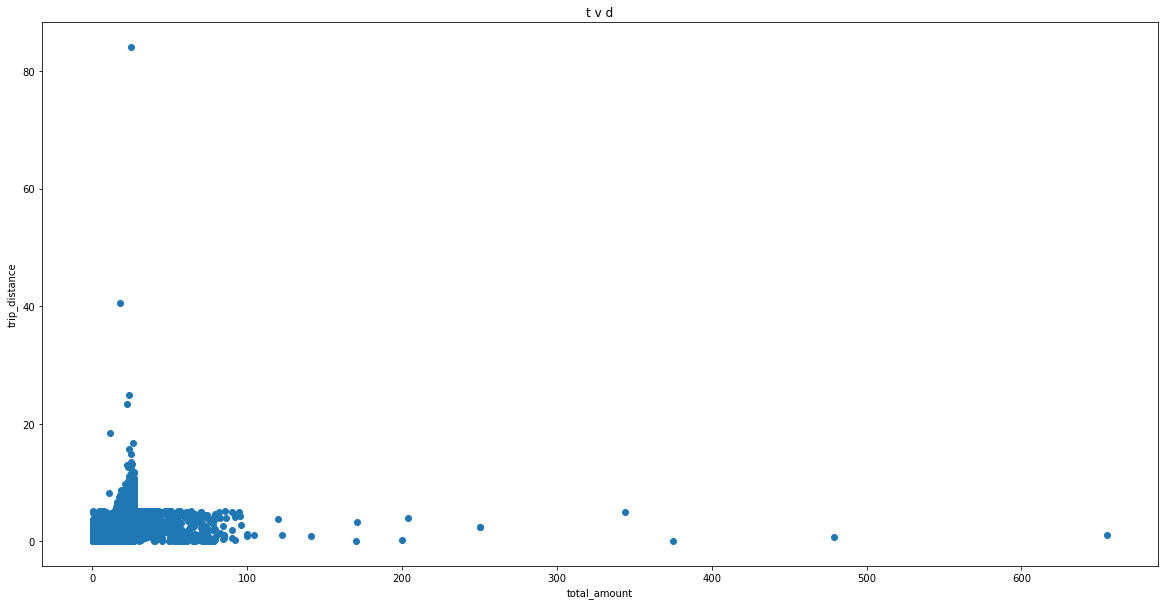

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.scatter(df3.total_amount, df3.trip_distance)
plt.xlabel('total_amount')
plt.ylabel('trip_distance')
plt.title('t v d')
plt.show()

In [15]:
df3.RatecodeID.describe()

count    1.409618e+06
mean     1.004001e+00
std      3.557331e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

In [16]:
def remove_pps_outliers(df3):
    df_out = pd.DataFrame()
    for key, subdf3 in df3.groupby('RatecodeID'):
        m = np.mean(subdf3.RatecodeID)
        st = np.std(subdf3.RatecodeID)
        reduced_df = subdf3[(subdf3.RatecodeID> 0 ) & (subdf3.RatecodeID<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(1409618, 18)

In [17]:
df4.RatecodeID.describe()

count    1.409618e+06
mean     1.004001e+00
std      3.557331e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

In [18]:
df4

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,3.0,0.5,2.56,0.0,0.3,15.36,2.5
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0
3,1.0,2020-10-01 00:37:04,2020-10-01 00:39:07,0.0,0.80,1.0,N,239,238,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,3.0,0.5,0.00,0.0,0.3,16.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409613,2.0,2020-10-27 12:44:48,2020-10-27 12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5
1409614,2.0,2020-10-28 07:52:13,2020-10-28 07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,0.0,0.5,0.00,0.0,0.3,6.80,0.0
1409615,2.0,2020-10-29 10:50:33,2020-10-29 11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,0.0,0.5,0.00,0.0,0.3,14.80,2.5
1409616,2.0,2020-10-30 10:40:17,2020-10-30 10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,0.0,0.5,0.00,0.0,0.3,14.80,2.5


In [19]:
df4.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [20]:
index_names = df4[ df4['RatecodeID'] == 99.0 ].index 

In [21]:
drop_A=df4.index[df4['RatecodeID'] == 99.0].tolist()
df5=df4.drop(df.index[drop_A])

In [22]:
df5.shape

(1409601, 18)

In [23]:
df5.RatecodeID.describe()

count    1.409601e+06
mean     1.002819e+00
std      1.035850e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: RatecodeID, dtype: float64

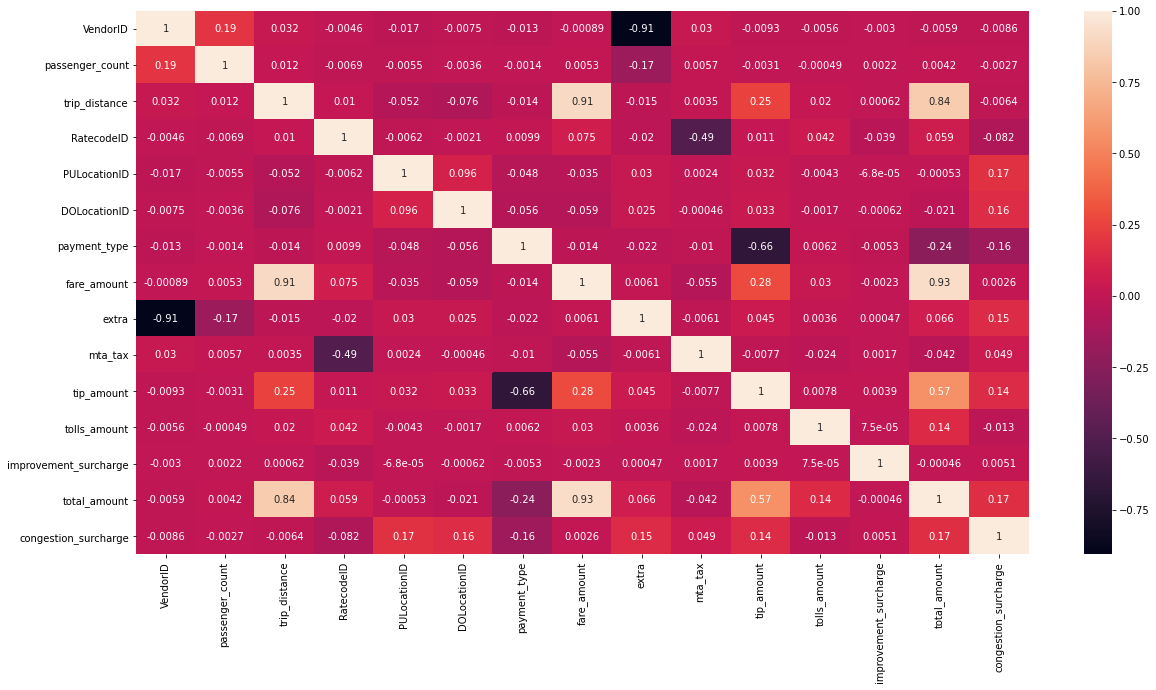

<Figure size 720x720 with 0 Axes>

In [24]:
import seaborn as sns
sns.heatmap(df5.corr(), annot=True) 
plt.figure(figsize=(10,10))
plt.show()

In [25]:
df6 = df5.assign(final_amount= (df5.fare_amount + df5.extra + df5.mta_tax + df5.tip_amount + df5.tolls_amount + df5.improvement_surcharge + df5.congestion_surcharge )) 

In [26]:
df7 = df6.drop(['extra' , 'mta_tax' , 'tip_amount' , 'tolls_amount' , 'improvement_surcharge' , 'total_amount' , 'congestion_surcharge'] , axis=1)

In [27]:
df7

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.50,15.80
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.00,17.86
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.50,8.80
3,1.0,2020-10-01 00:37:04,2020-10-01 00:39:07,0.0,0.80,1.0,N,239,238,1.0,4.50,12.45
4,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.00,19.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1409596,2.0,2020-10-31 19:54:02,2020-10-31 20:09:10,1.0,3.42,5.0,N,75,142,1.0,16.69,22.39
1409597,2.0,2020-10-31 19:26:19,2020-10-31 19:27:48,1.0,0.01,5.0,N,168,168,1.0,9.00,9.80
1409598,2.0,2020-10-31 22:19:02,2020-10-31 22:27:56,1.0,2.22,5.0,N,166,75,1.0,9.98,12.16
1409599,1.0,2020-10-22 09:39:01,2020-10-22 10:04:02,1.0,0.50,6.0,N,239,140,2.0,2.50,3.30


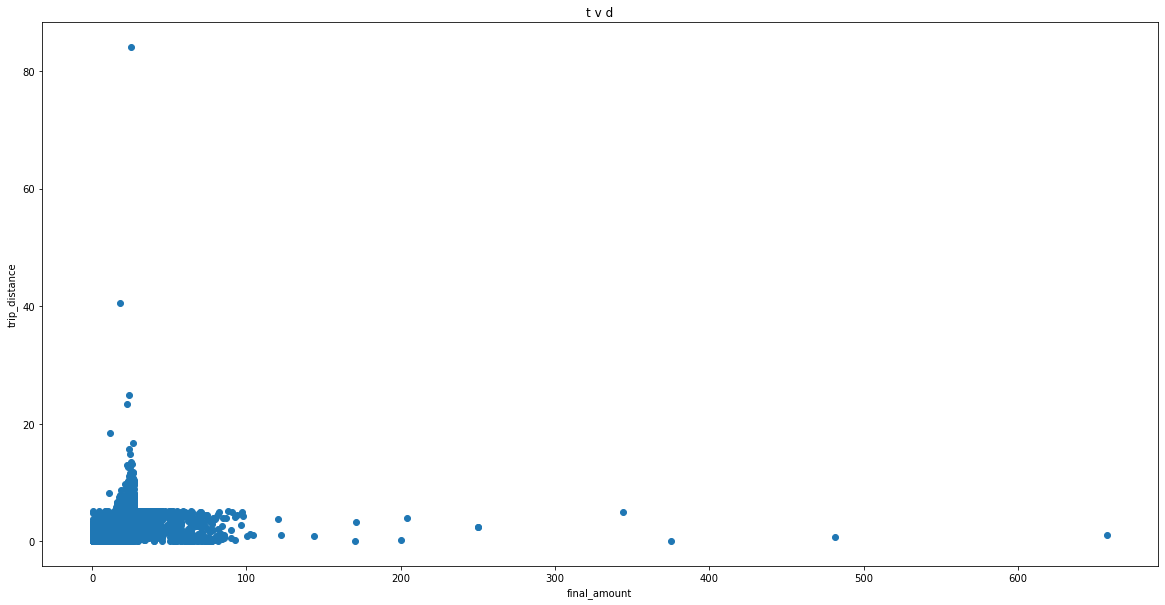

In [28]:
plt.scatter(df7.final_amount, df7.trip_distance)
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('t v d')
plt.show()

In [29]:
def remove_pps_outliers(df7):
    df_out = pd.DataFrame()
    for key, subdf7 in df7.groupby('VendorID'):
        m = np.mean(subdf7.final_amount)
        st = np.std(subdf7.final_amount)
        reduced_df = subdf7[(subdf7.final_amount> 0 ) & (subdf7.final_amount<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(1181556, 12)

In [30]:
df8.final_amount.describe()

count    1.181556e+06
mean     1.339453e+01
std      3.353124e+00
min      3.000000e-01
25%      1.090000e+01
50%      1.330000e+01
75%      1.580000e+01
max      2.188000e+01
Name: final_amount, dtype: float64

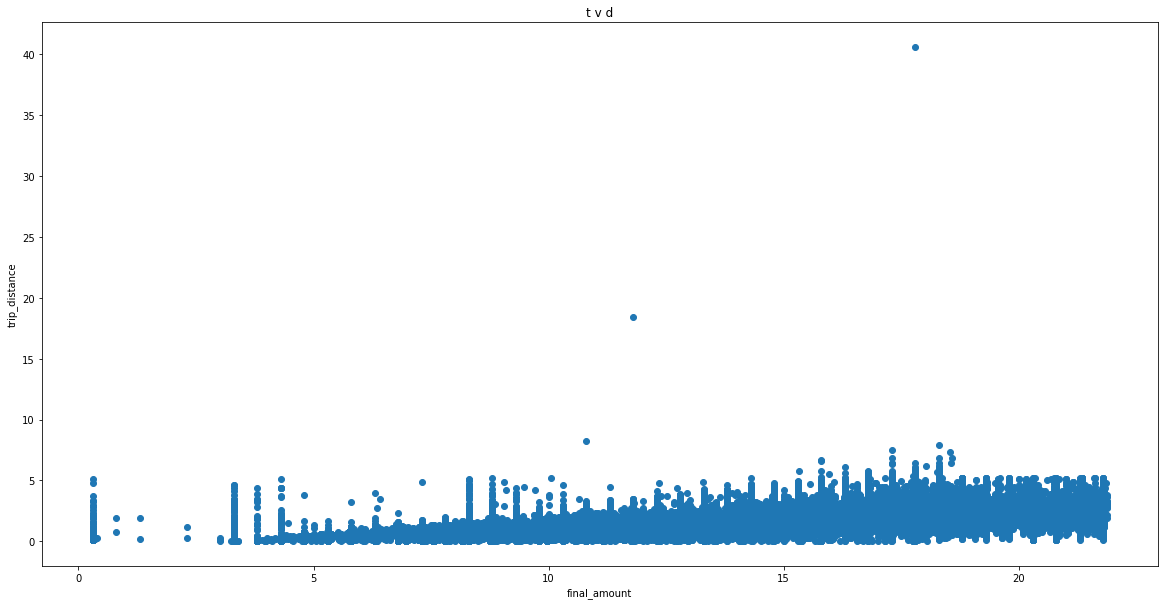

In [31]:
plt.scatter(df8.final_amount, df8.trip_distance)
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('t v d')
plt.show()